<a href="https://colab.research.google.com/github/Msyfrdnn09/UAP_Muhammad-Syafruddin_2022-007/blob/main/UAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama : Muhammad Syafruddin
# Nim  : 202210370311007

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/UAP/dataset.zip"
extract_path = "/content/dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Isi folder dataset:")
os.listdir(extract_path)


Isi folder dataset:


['dataset']

In [ ]:
# ===============================
# Core & Utility
# ===============================
import os
import zipfile
import numpy as np
import pandas as pd

# ===============================
# Visualization
# ===============================
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# TensorFlow & Keras
# ===============================
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ===============================
# Transfer Learning Models
# ===============================
from tensorflow.keras.applications import MobileNetV2, ResNet50

# ===============================
# Evaluation
# ===============================
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
import os

print("Isi /content:")
print(os.listdir('/content'))


Isi /content:
['.config', 'dataset', 'drive', 'sample_data']


In [ ]:
print("Isi /content/dataset:")
print(os.listdir('/content/dataset'))


Isi /content/dataset:
['dataset']


Data Generator

In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_dir = "/content/dataset/dataset/entrainement"
test_dir  = "/content/dataset/dataset/test"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

num_classes = train_gen.num_classes
class_names = list(train_gen.class_indices.keys())
print(class_names)


Found 7019 images belonging to 6 classes.
Found 157 images belonging to 6 classes.
['carton', 'glass', 'metal', 'paper', 'plastic', 'trash']


CNN Base (Non-Pretrained)

In [ ]:
cnn_model = tf.keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_cnn = cnn_model.fit(
    train_gen,
    epochs=10,
    validation_data=test_gen
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
  3/220 ━━━━━━━━━━━━━━━━━━━━ 16:36 5s/step - accuracy: 0.1684 - loss: 3.3574

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


220/220 ━━━━━━━━━━━━━━━━━━━━ 961s 4s/step - accuracy: 0.3931 - loss: 1.6423 - val_accuracy: 0.2611 - val_loss: 2.6068
Epoch 2/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 961s 4s/step - accuracy: 0.6587 - loss: 0.9335 - val_accuracy: 0.2930 - val_loss: 2.5200
Epoch 3/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 941s 4s/step - accuracy: 0.7274 - loss: 0.7608 - val_accuracy: 0.3185 - val_loss: 2.3643
Epoch 4/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 937s 4s/step - accuracy: 0.7535 - loss: 0.6886 - val_accuracy: 0.2739 - val_loss: 2.6885
Epoch 5/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 951s 4s/step - accuracy: 0.7978 - loss: 0.5695 - val_accuracy: 0.2548 - val_loss: 2.4802
Epoch 6/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 938s 4s/step - accuracy: 0.8358 - loss: 0.4733 - val_accuracy: 0.2739 - val_loss: 2.9950
Epoch 7/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 956s 4s/step - accuracy: 0.8539 - loss: 0.4240 - val_accuracy: 0.2866 - val_loss: 3.1601
Epoch 8/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 917s 4s/step - accuracy: 0.8761 - loss: 0.3683 - val_accuracy: 0.254

MobileNetV2 (Transfer Learning)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.applications import MobileNetV2, ResNet50

IMG_SIZE = (224, 224, 3)
NUM_CLASSES = num_classes   # dari training kamu

# ===============================
# MobileNetV2 (FUNCTIONAL API)
# ===============================
base_mobilenet = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=IMG_SIZE
)
base_mobilenet.trainable = False

inputs = tf.keras.Input(shape=IMG_SIZE)
x = base_mobilenet(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation="relu")(x)
outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

mobilenet_func = Model(inputs, outputs, name="mobilenet_functional")

# load weights dari model lama
mobilenet_func.set_weights(mobilenet_model.get_weights())

# save ke format keras 3
mobilenet_func.save(
    "/content/drive/MyDrive/UAP/image_classification_project/models/mobilenet_model.keras"
)

print("✅ MobileNetV2 FUNCTIONAL berhasil disimpan")


✅ MobileNetV2 FUNCTIONAL berhasil disimpan


ResNet50 (Transfer Learning)

In [ ]:
base_resnet = ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=IMG_SIZE
)
base_resnet.trainable = False

inputs = tf.keras.Input(shape=IMG_SIZE)
x = base_resnet(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation="relu")(x)
outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

resnet_func = Model(inputs, outputs, name="resnet50_functional")
resnet_func.set_weights(resnet_model.get_weights())

resnet_func.save(
    "/content/drive/MyDrive/UAP/image_classification_project/models/resnet50_model.keras"
)

print("✅ ResNet50 FUNCTIONAL berhasil disimpan")


✅ ResNet50 FUNCTIONAL berhasil disimpan


Evaluasi

In [ ]:
def evaluate_model(model, generator):
    y_true = generator.classes
    y_pred = np.argmax(model.predict(generator), axis=1)

    print(classification_report(
        y_true, y_pred,
        target_names=class_names
    ))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(
        cm, annot=True, fmt='d',
        xticklabels=class_names,
        yticklabels=class_names,
        cmap='Blues'
    )
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    return classification_report(
        y_true, y_pred,
        target_names=class_names,
        output_dict=True
    )


5/5 ━━━━━━━━━━━━━━━━━━━━ 23s 4s/step
              precision    recall  f1-score   support

      carton       0.00      0.00      0.00        15
       glass       0.38      0.11      0.17        28
       metal       0.21      0.36      0.26        25
       paper       0.45      0.34      0.39        44
     plastic       0.29      0.29      0.29        35
       trash       0.06      0.20      0.10        10

    accuracy                           0.25       157
   macro avg       0.23      0.22      0.20       157
weighted avg       0.30      0.25      0.25       157



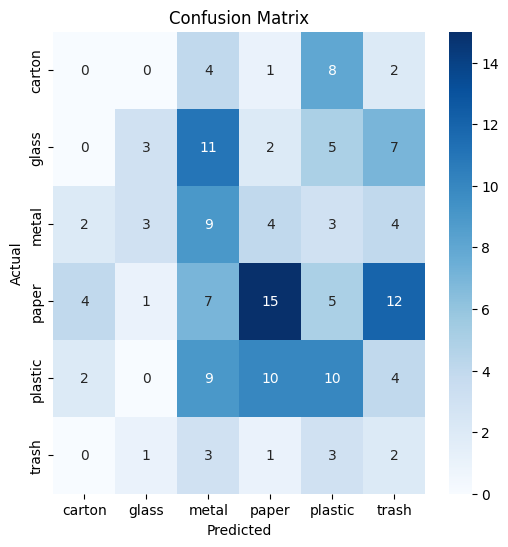

5/5 ━━━━━━━━━━━━━━━━━━━━ 27s 5s/step
              precision    recall  f1-score   support

      carton       0.38      0.33      0.36        15
       glass       0.62      0.71      0.67        28
       metal       0.60      0.84      0.70        25
       paper       0.71      0.80      0.75        44
     plastic       0.77      0.29      0.42        35
       trash       0.53      0.80      0.64        10

    accuracy                           0.63       157
   macro avg       0.60      0.63      0.59       157
weighted avg       0.65      0.63      0.61       157



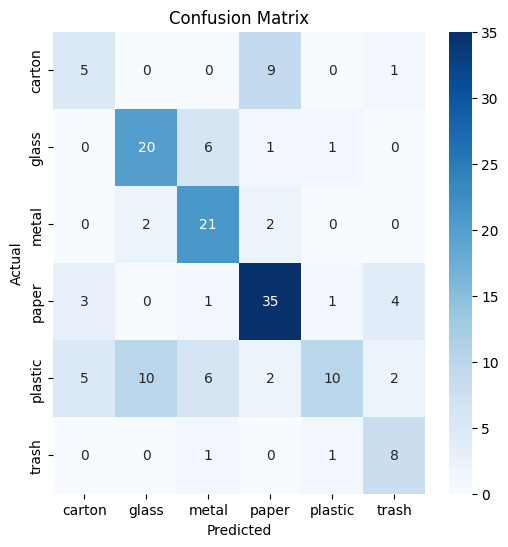

4/5 ━━━━━━━━━━━━━━━━━━━━ 9s 10s/step 

5/5 ━━━━━━━━━━━━━━━━━━━━ 54s 10s/step


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

      carton       0.00      0.00      0.00        15
       glass       0.00      0.00      0.00        28
       metal       0.21      0.28      0.24        25
       paper       0.32      0.80      0.46        44
     plastic       0.60      0.09      0.15        35
       trash       0.22      0.20      0.21        10

    accuracy                           0.30       157
   macro avg       0.22      0.23      0.18       157
weighted avg       0.27      0.30      0.21       157



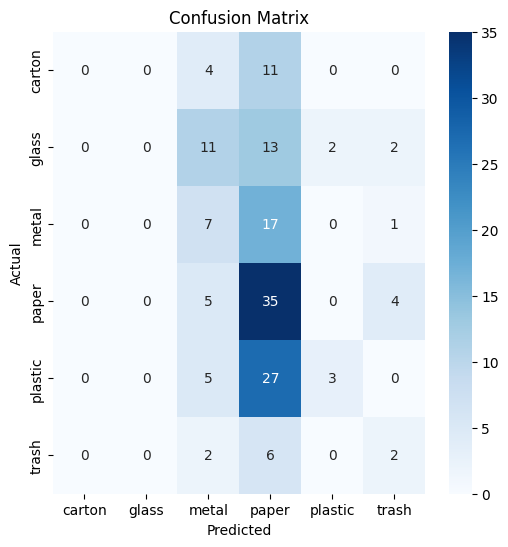

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
report_cnn       = evaluate_model(cnn_model, test_gen)
report_mobilenet = evaluate_model(mobilenet_model, test_gen)
report_resnet    = evaluate_model(resnet_model, test_gen)


Grafik Loss & Accuracy

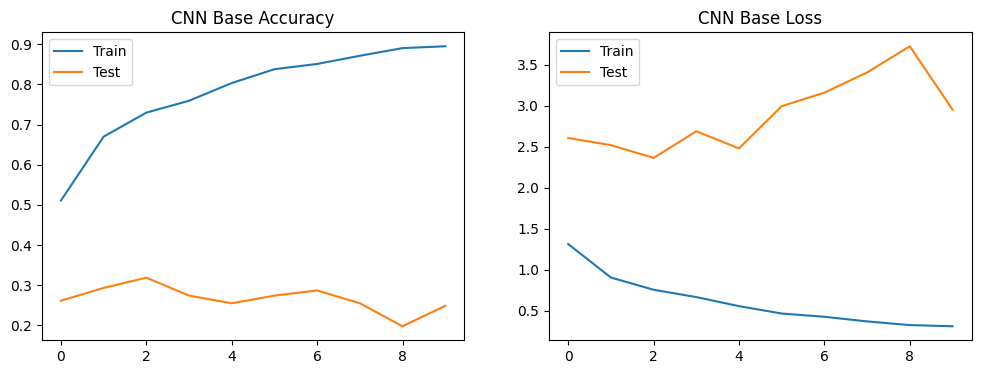

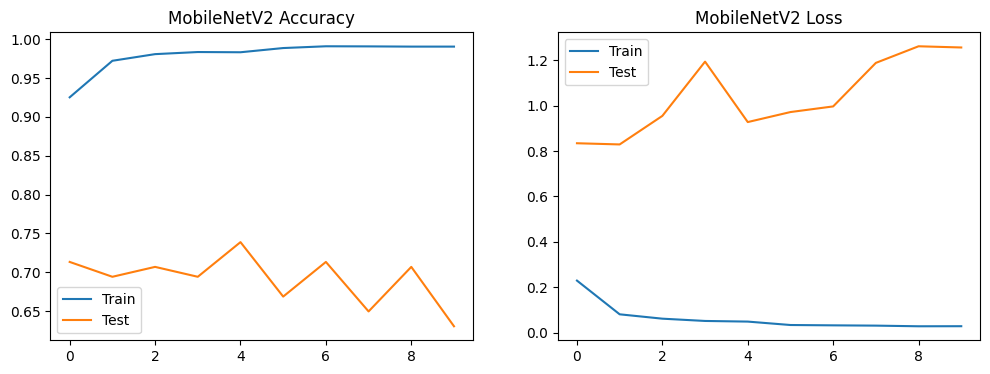

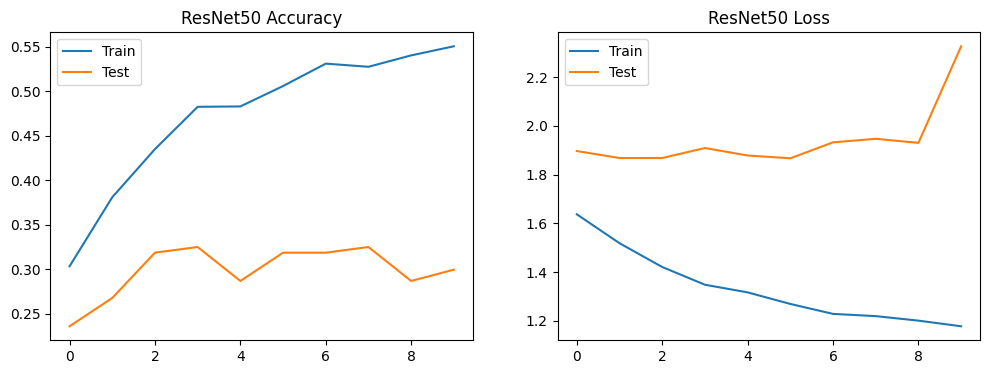

In [ ]:
def plot_history(history, title):
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Test')
    plt.title(f'{title} Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Test')
    plt.title(f'{title} Loss')
    plt.legend()

    plt.show()

plot_history(history_cnn, "CNN Base")
plot_history(history_mobilenet, "MobileNetV2")
plot_history(history_resnet, "ResNet50")


Tabel Perbandingan Model

In [ ]:
def summary(report, model_name):
    return {
        "Model": model_name,
        "Accuracy": report["accuracy"],
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1-Score": report["weighted avg"]["f1-score"]
    }

df_comparison = pd.DataFrame([
    summary(report_cnn, "CNN Base"),
    summary(report_mobilenet, "MobileNetV2"),
    summary(report_resnet, "ResNet50")
])

df_comparison


,Model,Accuracy,Precision,Recall,F1-Score
0,CNN Base,0.248408,0.297273,0.248408,0.251896
1,MobileNetV2,0.630573,0.649390,0.630573,0.609079
2,ResNet50,0.299363,0.270686,0.299363,0.212855


MENYIMPAN SEMUA HASIL

In [ ]:
# ======================================
# SAVE ALL ARTIFACTS FOR STREAMLIT
# ======================================

import os
import pickle
import json
import pandas as pd

# ===============================
# BASE DIRECTORY (Google Drive)
# ===============================
BASE_DIR = "/content/drive/MyDrive/UAP/image_classification_project"

MODEL_DIR   = os.path.join(BASE_DIR, "models")
HISTORY_DIR = os.path.join(BASE_DIR, "history")
REPORT_DIR  = os.path.join(BASE_DIR, "reports")

os.makedirs(MODEL_DIR, exist_ok=True)
os.makedirs(HISTORY_DIR, exist_ok=True)
os.makedirs(REPORT_DIR, exist_ok=True)

print("Folder siap digunakan")

# ===============================
# 1. SAVE MODELS (.h5)
# ===============================
cnn_model.save(os.path.join(MODEL_DIR, "cnn_model.h5"))
mobilenet_model.save(os.path.join(MODEL_DIR, "mobilenet_model.h5"))
resnet_model.save(os.path.join(MODEL_DIR, "resnet50_model.h5"))

print("Model CNN, MobileNetV2, ResNet50 berhasil disimpan")

# ===============================
# 2. SAVE LABEL CLASSES
# ===============================
labels_path = os.path.join(MODEL_DIR, "labels.txt")

with open(labels_path, "w") as f:
    for label in class_names:
        f.write(label + "\n")

print("Label kelas berhasil disimpan")

# ===============================
# 3. SAVE TRAINING HISTORY
# ===============================
with open(os.path.join(HISTORY_DIR, "cnn_history.pkl"), "wb") as f:
    pickle.dump(history_cnn.history, f)

with open(os.path.join(HISTORY_DIR, "mobilenet_history.pkl"), "wb") as f:
    pickle.dump(history_mobilenet.history, f)

with open(os.path.join(HISTORY_DIR, "resnet_history.pkl"), "wb") as f:
    pickle.dump(history_resnet.history, f)

print("History training berhasil disimpan")

# ===============================
# 4. SAVE CLASSIFICATION REPORTS
# ===============================
with open(os.path.join(REPORT_DIR, "report_cnn.json"), "w") as f:
    json.dump(report_cnn, f, indent=4)

with open(os.path.join(REPORT_DIR, "report_mobilenet.json"), "w") as f:
    json.dump(report_mobilenet, f, indent=4)

with open(os.path.join(REPORT_DIR, "report_resnet.json"), "w") as f:
    json.dump(report_resnet, f, indent=4)

print("Classification report berhasil disimpan")

# ===============================
# 5. SAVE MODEL COMPARISON TABLE
# ===============================
df_comparison.to_csv(
    os.path.join(REPORT_DIR, "model_comparison.csv"),
    index=False
)

print("Tabel perbandingan model berhasil disimpan")

# ===============================
# 6. SAVE PREPROCESS CONFIG
# ===============================
preprocess_config = {
    "img_size": [224, 224],
    "rescale": 1.0 / 255,
    "num_classes": num_classes,
    "batch_size": 32,
    "class_names": class_names
}

with open(os.path.join(MODEL_DIR, "preprocess_config.json"), "w") as f:
    json.dump(preprocess_config, f, indent=4)

print("Konfigurasi preprocessing berhasil disimpan")

print("\nSEMUA FILE PENTING BERHASIL DISIMPAN ✅")


Folder siap digunakan


Model CNN, MobileNetV2, ResNet50 berhasil disimpan
Label kelas berhasil disimpan
History training berhasil disimpan
Classification report berhasil disimpan
Tabel perbandingan model berhasil disimpan
Konfigurasi preprocessing berhasil disimpan

SEMUA FILE PENTING BERHASIL DISIMPAN ✅


In [ ]:
# ===============================
# SAVE MODELS IN KERAS 3 FORMAT
# ===============================

BASE_DIR = "/content/drive/MyDrive/UAP/image_classification_project/models"

cnn_model.save(f"{BASE_DIR}/cnn_model.keras")
mobilenet_model.save(f"{BASE_DIR}/mobilenet_model.keras")
resnet_model.save(f"{BASE_DIR}/resnet50_model.keras")

print("SEMUA MODEL BERHASIL DISIMPAN KE FORMAT .keras")


SEMUA MODEL BERHASIL DISIMPAN KE FORMAT .keras
